In [7]:
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy import units
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import datetime
import matplotlib.dates as mdates
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

from matplotlib import rcParams
rcParams['xtick.direction'] = 'out'
rcParams['ytick.direction'] = 'out'

In [8]:
BIGB = SkyCoord(ra=70.66917*u.degree, dec=61.67750*u.degree, frame='icrs')
print BIGB
ra_hms = BIGB.ra.hms
print ra_hms.h, 'h ', ra_hms.m, 'm ', ra_hms.s, 's'
BIGB.dec

<SkyCoord (ICRS): (ra, dec) in deg
    ( 70.66917,  61.6775)>
4.0 h  42.0 m  40.6008 s


<Latitude 61.6775 deg>

In [9]:
# define MAGIC Location
MAGIC = EarthLocation(lat=28.76194*u.deg, lon=-17.89*u.deg, height=2200*u.m)
utcoffsetSummer = +1*u.hour
utcoffsetWinter = 0*u.hour 

# For plotting a month we will suppose it's a winter month, that is, no offset
time = Time('2017-02-01T00:00:00.00', format='isot', scale='utc')
#time = Time('2017-01-10 23:00:00') + utcoffsetWinter

# BIGB coordinates in MAGIC Horizontal Coordinate System
BIGB_altaz = BIGB.transform_to(AltAz(obstime=time,location=MAGIC))  
"BIGB's Altitude = {0.alt:.2}".format(BIGB_altaz)  

"BIGB's Altitude = 4.7e+01 deg"

In [10]:
from astropy.coordinates import get_moon
from astropy.coordinates import get_sun

In [11]:
#midnight4 = Time('2017-7-21 00:00:00') + utcoffsetSummer
# create an array of times from 12h before to 12 after midnight
delta_midnight4 = np.linspace(0, 24, 1e2)*u.hour
times4 = time + delta_midnight4
#print times4 
# MAGIC Horizontal Coordinate system
altazframe4 = AltAz(obstime=times4, location=MAGIC)
# Moon's position in it
moonaltazs4 = get_moon(times4).transform_to(altazframe4)

# Sun's position in it
sunaltazs4 = get_sun(times4).transform_to(altazframe4)
BIGB_altazs4 = BIGB.transform_to(altazframe4)  

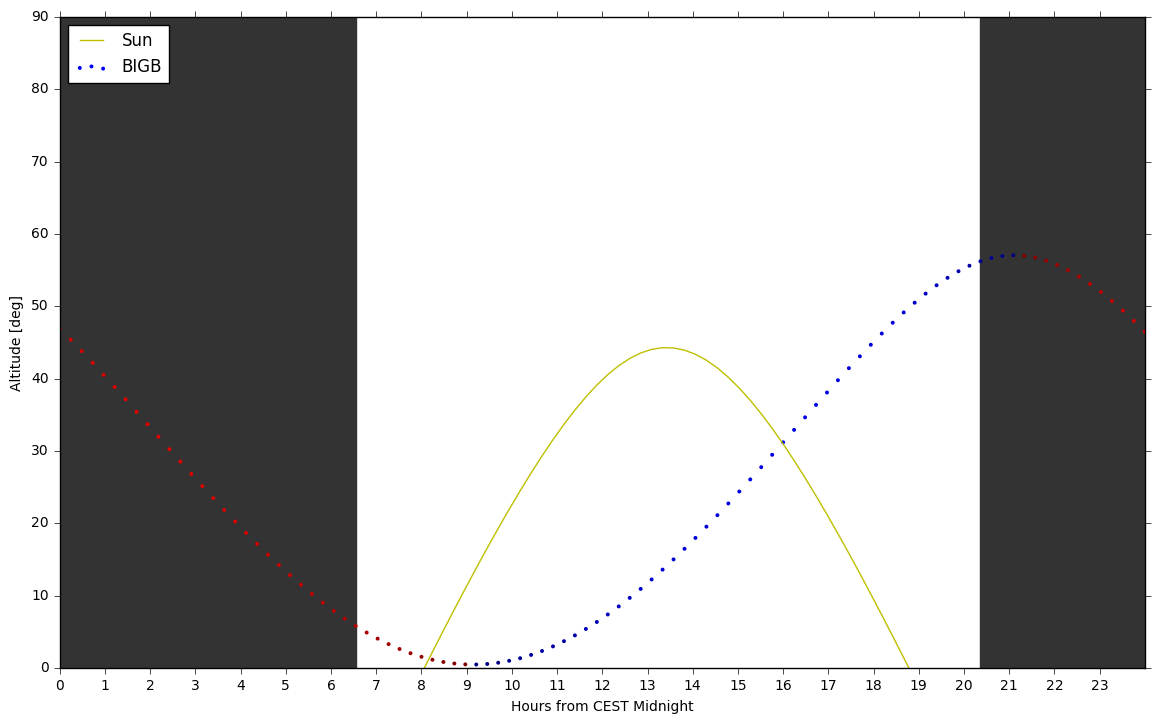

In [13]:
figu = plt.figure(figsize=(14, 8.4))
#plt.plot(delta_midnight4, moonaltazs4.alt, color='g', label='Moon')  
plt.plot(delta_midnight4, sunaltazs4.alt, color='y', label='Sun')  
# plot accounting fro the Azimuth
plt.scatter(delta_midnight4, BIGB_altazs4.alt, c=BIGB_altazs4.az, label='BIGB', lw=0, s=8)  
# plot a gray band corresponding to dark time i.e. negative altitude of the sun
plt.fill_between(delta_midnight4.to('hr').value, 0, 90, sunaltazs4.alt < -18*u.deg, color='0.2', zorder=0)  
#plt.colorbar().set_label('Azimuth [deg]')  
plt.legend(loc='upper left')  
plt.xlim(0, 24)  
plt.xticks(np.arange(0,24,1))  
plt.ylim(0, 90)  
plt.xlabel('Hours from CEST Midnight')  
plt.ylabel('Altitude [deg]')  
plt.show()